# Code for figure 4

This code was used for the analysis presented in  
"Do higher-order interactions promote synchronization?"  
by Yuanzhao Zhang, Maxime Lucas, and Federico Battiston

In [5]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from tqdm import tqdm

import xgi

sb.set_theme(style="ticks", context="paper")

fig_dir = "figures/"
results_dir = "results/"

Path(fig_dir).mkdir(parents=True, exist_ok=True)
Path(results_dir).mkdir(parents=True, exist_ok=True)

# Fig. 4: Higher-order interactions decrease degree heterogeneity in random hypergraphs

In [15]:
# load if already computed
with np.load(f"{results_dir}figure_4_data_v2.npz") as data:
    Ns = data["Ns"]
    heterogeneity = data["heterogeneity"]
    heterogeneity2 = data["heterogeneity2"]

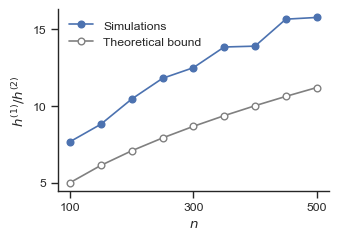

In [16]:
fig, ax = plt.subplots(figsize=(3.5, 2.36))

ax.set_xlabel(r"$n$")
ax.set_ylabel(r"$h^{(1)} / h^{(2)}$")
# ax.set_ylabel(r"$r'$")

ax.plot(Ns, heterogeneity / heterogeneity2, marker="o", c="b", label="Simulations")
ax.plot(
    Ns,
    np.sqrt(Ns) / 2,
    marker="o",
    c="grey",
    mfc="white",
    label="Theoretical bound",
)

ax.set_yticks([5, 10, 15])
ax.set_xticks([100, 300, 500])

ax.legend(loc="upper left", frameon=False)

sb.despine()

fig_name = f"figure_4"
plt.savefig(f"{fig_dir}{fig_name}.pdf", dpi=250, bbox_inches="tight")

plt.show()

In [12]:
# if not already computed, compute
# can take a bit of time
## compute the expected values of min and max degrees using both simulations and theory

Ns = np.arange(100, 501, 50)
K = np.zeros((8, len(Ns)))
sample = 50

for j in tqdm(range(len(Ns))):
    # generate min and max degrees numerically to compare with theory
    K_min = np.zeros(sample)
    K_max = np.zeros(sample)

    K_min_2 = np.zeros(sample)
    K_max_2 = np.zeros(sample)

    N = Ns[j]  # number of nodes
    ps = [
        0.1,
        0.1,
    ]  # ps[i] is the wiring probability of any i+2 nodes (ps[0] is for edges, e.g.)
    alpha = 0.5

    for i in range(sample):

        # generate hyperedges
        H = xgi.random_hypergraph(N, ps)
        
        K_min[i] = H.nodes.degree(order=1).min() #np.min(K1)
        K_max[i] = H.nodes.degree(order=1).max() #np.max(K1)
        K_min_2[i] = H.nodes.degree(order=2).min()# np.min(K2)
        K_max_2[i] = H.nodes.degree(order=2).max() #np.max(K2)

    K[0, j] = np.mean(K_min)
    K[1, j] = np.mean(K_max)
    K[2, j] = np.mean(K_min_2)
    K[3, j] = np.mean(K_max_2)

    p = 0.1
    q = 1 - p
    # x is the max degree and z is the cumulative distribution, formula according to Bollobas 1980
    # distribution for the min degree can be obtained using symmetry
    y0 = 0.52
    x0 = p * N + np.sqrt(2 * p * q * N * np.log(N)) * (
        1
        - np.log(np.log(N)) / 4 / np.log(N)
        - np.log(2 * np.sqrt(np.pi)) / 2 / np.log(N)
        + y0 / 2 / np.log(N)
    )

    K[4, j] = 2 * p * N - x0
    K[5, j] = x0

    N_2 = (N - 2) * (N - 1) / 2
    x0 = p * N_2 + np.sqrt(2 * p * q * N_2 * np.log(N_2)) * (
        1
        - np.log(np.log(N_2)) / 4 / np.log(N_2)
        - np.log(2 * np.sqrt(np.pi)) / 2 / np.log(N_2)
        + y0 / 2 / np.log(N_2)
    )
    K[6, j] = 2 * p * N_2 - x0
    K[7, j] = x0

100%|████████████████████████████████████████████████████████| 9/9 [41:30<00:00, 276.73s/it]


In [13]:
## compute the degree heterogeneity index
heterogeneity = (K[1, :] - p * Ns) / (p * Ns)
heterogeneity2 = (K[3, :] - p * (Ns - 1) * (Ns - 2) / 2) / (
    p * (Ns - 1) * (Ns - 2) / 2
)

In [14]:
np.savez(
    f"{results_dir}figure_4_data_v2.npz",
    Ns=Ns,
    heterogeneity=heterogeneity,
    heterogeneity2=heterogeneity2,
)